In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats import linregress
import module_import
from src.quant_analysis.module_import import ETF_0050
df = ETF_0050()

[2024-08-30 14:11:55,519][log.log][INFO] 
Executing select_data_query
Args: ('stock_price', "stock_id ='0050' ORDER BY Date DESC LIMIT 500")
Kwargs: {}
Return: SELECT stock_id, Close, Open, High, Low, Volume, Date FROM stock_price WHERE stock_id ='0050' ORDER BY Date DESC LIMIT 500;

[2024-08-30 14:11:55,970][log.log][INFO] Query execution time: 0.2774026393890381 seconds.


<Axes: title={'center': '0050'}, xlabel='Date'>

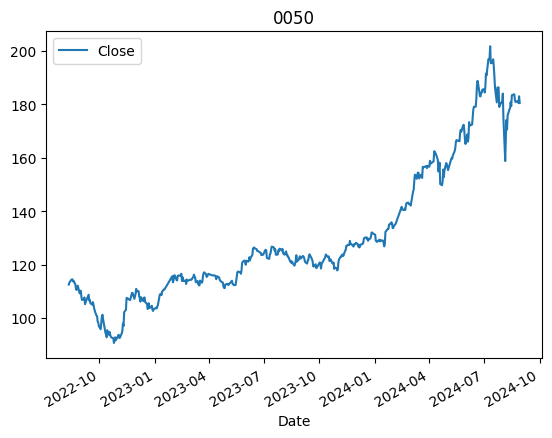

In [2]:
df.plot(title="0050")

In [3]:
type(df.index.astype(str).values)

numpy.ndarray

In [9]:
#  x 軸數據（即 df.index）包含的是時間戳數據 (datetime64[ns])，而 linregress() 期望數字類型的數據作為輸入。
df['date_num'] = pd.to_datetime(df.index).astype(int) // 10**9
reg_up = linregress(x = df['date_num'], y = df['Close'])

In [10]:
print(reg_up.slope)
print(reg_up.intercept)
print(reg_up[0])
print(reg_up[1])

1.2474870896865138e-06
-1981.2038364746652
1.2474870896865138e-06
-1981.2038364746652


In [6]:
regression_line = reg_up.intercept + reg_up.slope * df['date_num']

Date
2022-08-11     89.844290
2022-08-12     89.952073
2022-08-15     90.275422
2022-08-16     90.383205
2022-08-17     90.490987
                 ...    
2024-08-23    169.926973
2024-08-26    170.250322
2024-08-27    170.358105
2024-08-28    170.465888
2024-08-29    170.573671
Name: date_num, Length: 500, dtype: float64

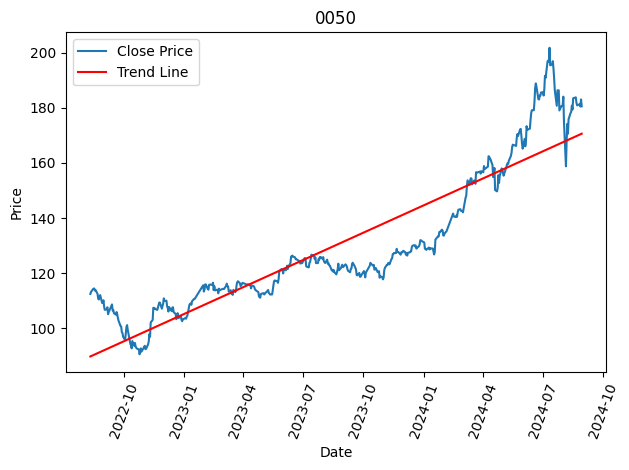

In [7]:
plt.plot(df.index, df['Close'], label='Close Price')
plt.plot(df.index, regression_line, label='Trend Line', color='red')

plt.title('0050')
plt.xlabel('Date')
plt.xticks(rotation = 70)
plt.ylabel('Price')
plt.legend()
plt.tight_layout()
plt.show()

In [18]:
df_temp = df[df["Close"] > regression_line]
reg = linregress(df_temp['date_num'], df_temp["Close"])
df['HT'] = reg[1] + reg[0]* df['date_num']
df

,Close,date_num,HT
Date,,,
2022-08-11,112.505,1660176000,96.177661
2022-08-12,113.208,1660262400,96.292280
2022-08-15,114.239,1660521600,96.636138
2022-08-16,114.426,1660608000,96.750757
2022-08-17,114.473,1660694400,96.865377
...,...,...,...
2024-08-23,180.950,1724371200,181.339821
2024-08-26,181.250,1724630400,181.683679
2024-08-27,180.450,1724716800,181.798298


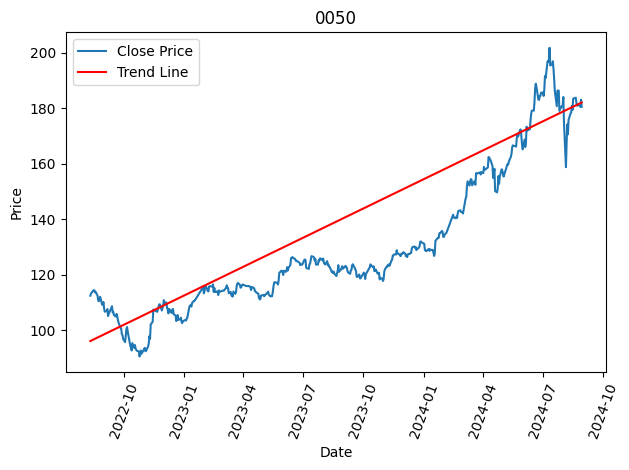

In [19]:
plt.plot(df.index, df['Close'], label='Close Price')
plt.plot(df.index, df['HT'], label='Trend Line', color='red')

plt.title('0050')
plt.xlabel('Date')
plt.xticks(rotation = 70)
plt.ylabel('Price')
plt.legend()
plt.tight_layout()
plt.show()